In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install matplotlib

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.options.plotting.backend = 'plotly'

import plotly.io as pio
pio.renderers.default = 'notebook_connected'


from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go

from datetime import date, timedelta


from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

path = '/content/drive/MyDrive/Colab Notebooks/Retail/data/'

In [6]:
data = pd.read_csv(path + 'df1020.csv')
data.head()

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday,Unnamed: 0,대분류,소분류
0,2021-07-24,0,황도복숭아,1,5980,5980,7,5,381,과일,복숭아
1,2021-07-24,0,황도복숭아,1,5980,5980,7,5,381,과일,복숭아
2,2021-07-24,0,황도복숭아,1,5980,5980,7,5,381,과일,복숭아
3,2021-07-24,0,황도복숭아,1,5980,5980,7,5,381,과일,복숭아
4,2021-07-24,0,황도복숭아,1,5980,5980,7,5,381,과일,복숭아


In [7]:
df = data.copy()

In [6]:
df.대분류.unique()

array(['과일', '채소', '두부/콩나물/계란', '냉장식품', '건조식품', '생수/음료/커피', '과자/대용식',
       '유제품', '소스/양념/조미료', '김치/반찬', '통조림/즉석밥', '냉동', '주류', '커피/원두/차',
       '라면/면류', '아이스크림', '문구', '세탁용품', '주방용품', '양곡', '수산', '정육', '유아',
       '냉동식품', '세제', '화장실/물티슈/위생', '스포츠레저', '화장지/물티슈/위생', '의류잡화',
       '헤어바디구강', '껌', '소형가전・공구'], dtype=object)

In [7]:
mapping = {'과일':1, '채소':2, '두부/콩나물/계란':3, '냉장식품':4, '건조식품':5, '생수/음료/커피':6, '과자/대용식':7,
       '유제품':8, '소스/양념/조미료':9, '김치/반찬':10, '통조림/즉석밥':11, '냉동':12, '주류':13, '커피/원두/차':14,
       '라면/면류':15, '아이스크림':16, '문구':17, '세탁용품':18, '주방용품':19, '양곡':20, '수산':21, '정육':22, '유아':23,
       '냉동식품':24, '세제':25, '화장실/물티슈/위생':26, '스포츠레저':27, '화장지/물티슈/위생':28, '의류잡화':29,
       '헤어바디구강':30, '껌':31, '소형가전・공구':32}

In [8]:
labeling = df.대분류.map(mapping)
df['label'] = labeling

In [ ]:
# mapping = {'복숭아':1, '고추':2, '배':3, '사과':4, '감':5, '감귤':6, '만감류':7, '딸기':8, '산딸기':9, '수박':10, '포도':11,
#        '토마토':12, '참외':13, '자두':14, '살구':15, '무화과':16, '바나나':17, '파인애플':18, '레몬':19, '키위':20, '체리':21,
#        '오렌지':22, '멜론':23, '망고':24, '블루베리':25, '아보카도':26, '귤':27, '방울토마토':28, '채소':29, '황도':30, '석류':31,
#        '블루벨리':32, '용과':33}

In [11]:
# 과일
# df_fruit = df[df['label']==1]

In [8]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [9]:
df

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday,대분류,소분류
0,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
1,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
2,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
3,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
4,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
...,...,...,...,...,...,...,...,...,...,...
13188070,2022-09-29,8809267390136,서라벌특란30구,1,7800,7800,9,3,두부/콩나물/계란,계란
13188071,2022-09-30,8809267390136,서라벌특란30구,1,7800,7800,9,4,두부/콩나물/계란,계란
13188072,2022-09-30,8809267390136,서라벌특란30구,1,7800,7800,9,4,두부/콩나물/계란,계란
13188073,2022-09-30,8809267390136,서라벌특란30구,2,7800,15600,9,4,두부/콩나물/계란,계란


In [ ]:
# labeling = df_fruit.소분류.map(mapping)
# df_fruit['label_2'] = labeling

In [10]:
df.month.value_counts()

9     1456832
8     1249890
1     1234841
3     1180591
7     1160122
6     1142281
4     1132144
5     1130215
2     1023089
12     955688
10     771687
11     750695
Name: month, dtype: int64

In [50]:
df_2 = df[df['month']==2]
df_3 = df[df['month']==3]
df_4 = df[df['month']==4]
df_5 = df[df['month']==5]
df_6 = df[df['month']==6]
df_7 = df[df['month']==7]
df_8 = df[df['month']==8]
df_9 = df[df['month']==9]
df_10 = df[df['month']==10]
df_11 = df[df['month']==11]
df_12 = df[df['month']==12]

# 1월

In [26]:
df_1 = df[df['month']==1]

In [32]:
# df_1['SAL_DT'] = pd.to_datetime(df_1['SAL_DT'])

In [11]:
df_1

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday,대분류,소분류
12134,2022-01-07,200024,대파1단,1,4000,4000,1,4,채소,파
12135,2022-01-07,200024,대파1단,1,4000,4000,1,4,채소,파
12136,2022-01-08,200024,대파1단,1,4000,4000,1,5,채소,파
12137,2022-01-22,200024,대파1단,1,1500,1500,1,5,채소,파
12138,2022-01-22,200024,대파1단,1,1500,1500,1,5,채소,파
...,...,...,...,...,...,...,...,...,...,...
13186824,2022-01-31,8809267390136,서라벌특란30구,1,6500,6500,1,0,두부/콩나물/계란,계란
13186825,2022-01-31,8809267390136,서라벌특란30구,1,6500,6500,1,0,두부/콩나물/계란,계란
13186826,2022-01-31,8809267390136,서라벌특란30구,1,6500,6500,1,0,두부/콩나물/계란,계란
13186827,2022-01-31,8809267390136,서라벌특란30구,1,6500,6500,1,0,두부/콩나물/계란,계란


In [35]:
df_1_mon = df_1[df_1['weekday']==0]
df_1_tue = df_1[df_1['weekday']==1]
df_1_wed = df_1[df_1['weekday']==2]
df_1_thu = df_1[df_1['weekday']==3]
df_1_fri = df_1[df_1['weekday']==4]
df_1_sat = df_1[df_1['weekday']==5]
df_1_sun = df_1[df_1['weekday']==6]

In [ ]:
# df_1['SAL_DT']= df_1['SAL_DT'].astype('string')

In [ ]:
df_1 = df_1.drop(columns=['SAL_DT','PLU_CD'])

In [ ]:
# df_1= df_1.astype({'GDS_NM':'string', '대분류':'string', '소분류':'string', 'SALE_QTY':float, 'SALE_PRC':float,'SALE_AMT':float, 'month':float, 'weekday':float})

In [32]:
dfdf = df_1[['SALE_PRC', 'label']]

scaler = MinMaxScaler()
df_scale = scaler.fit_transform(dfdf)

In [26]:
df_scale

array([[0.00010322, 0.03225806],
       [0.00010322, 0.03225806],
       [0.00010322, 0.03225806],
       ...,
       [0.00016774, 0.06451613],
       [0.00016774, 0.06451613],
       [0.00016774, 0.06451613]])

In [33]:
from sklearn.cluster import KMeans



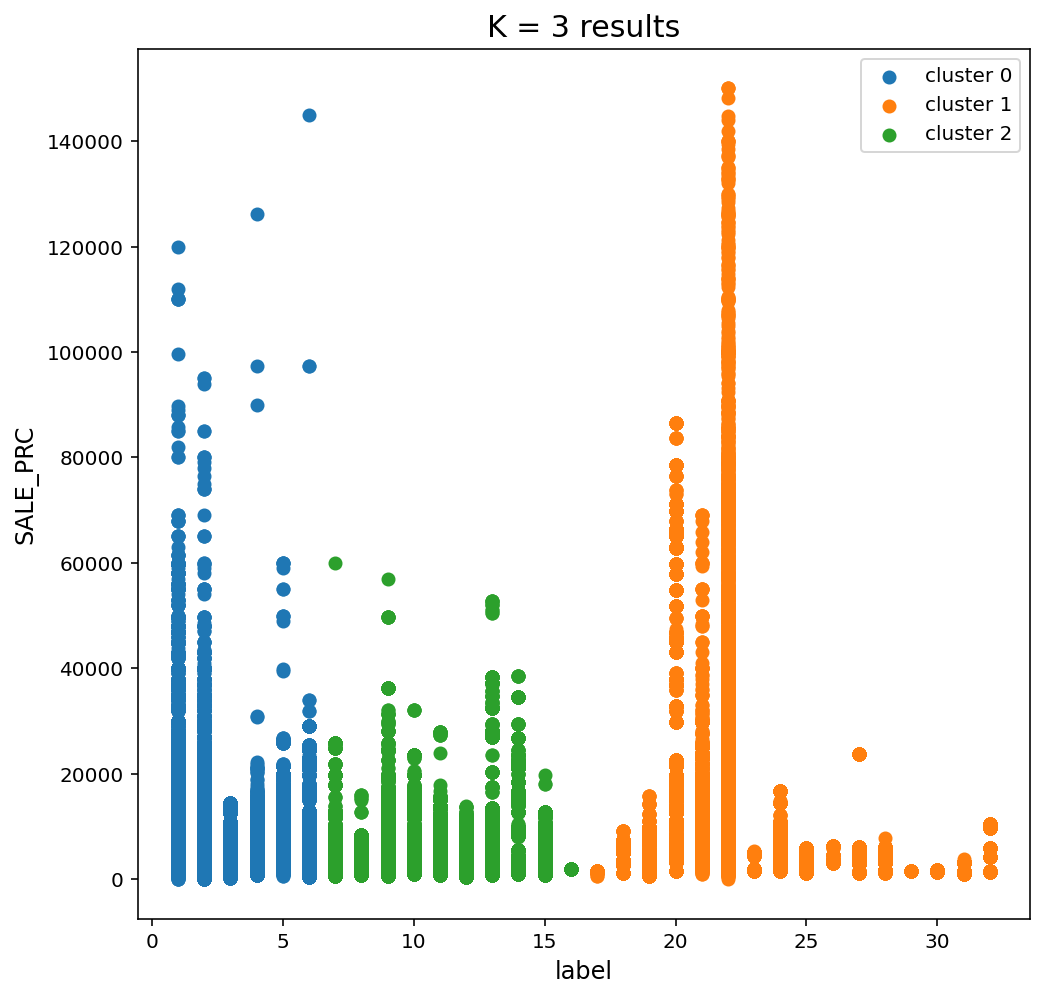

In [34]:
dfdf = df_1[['SALE_PRC', 'label']]

scaler = MinMaxScaler()
df_scale = scaler.fit_transform(dfdf)
k = 3

model = KMeans(n_clusters = k, random_state = 42)

model.fit(df_scale)

df_1['cluster'] = model.fit_predict(df_scale)
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df_1.loc[df_1['cluster'] == i, 'label'], df_1.loc[df_1['cluster'] == i, 'SALE_PRC'], 
                label = 'cluster ' + str(i))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('label', size = 12)
plt.ylabel('SALE_PRC', size = 12)
plt.show()

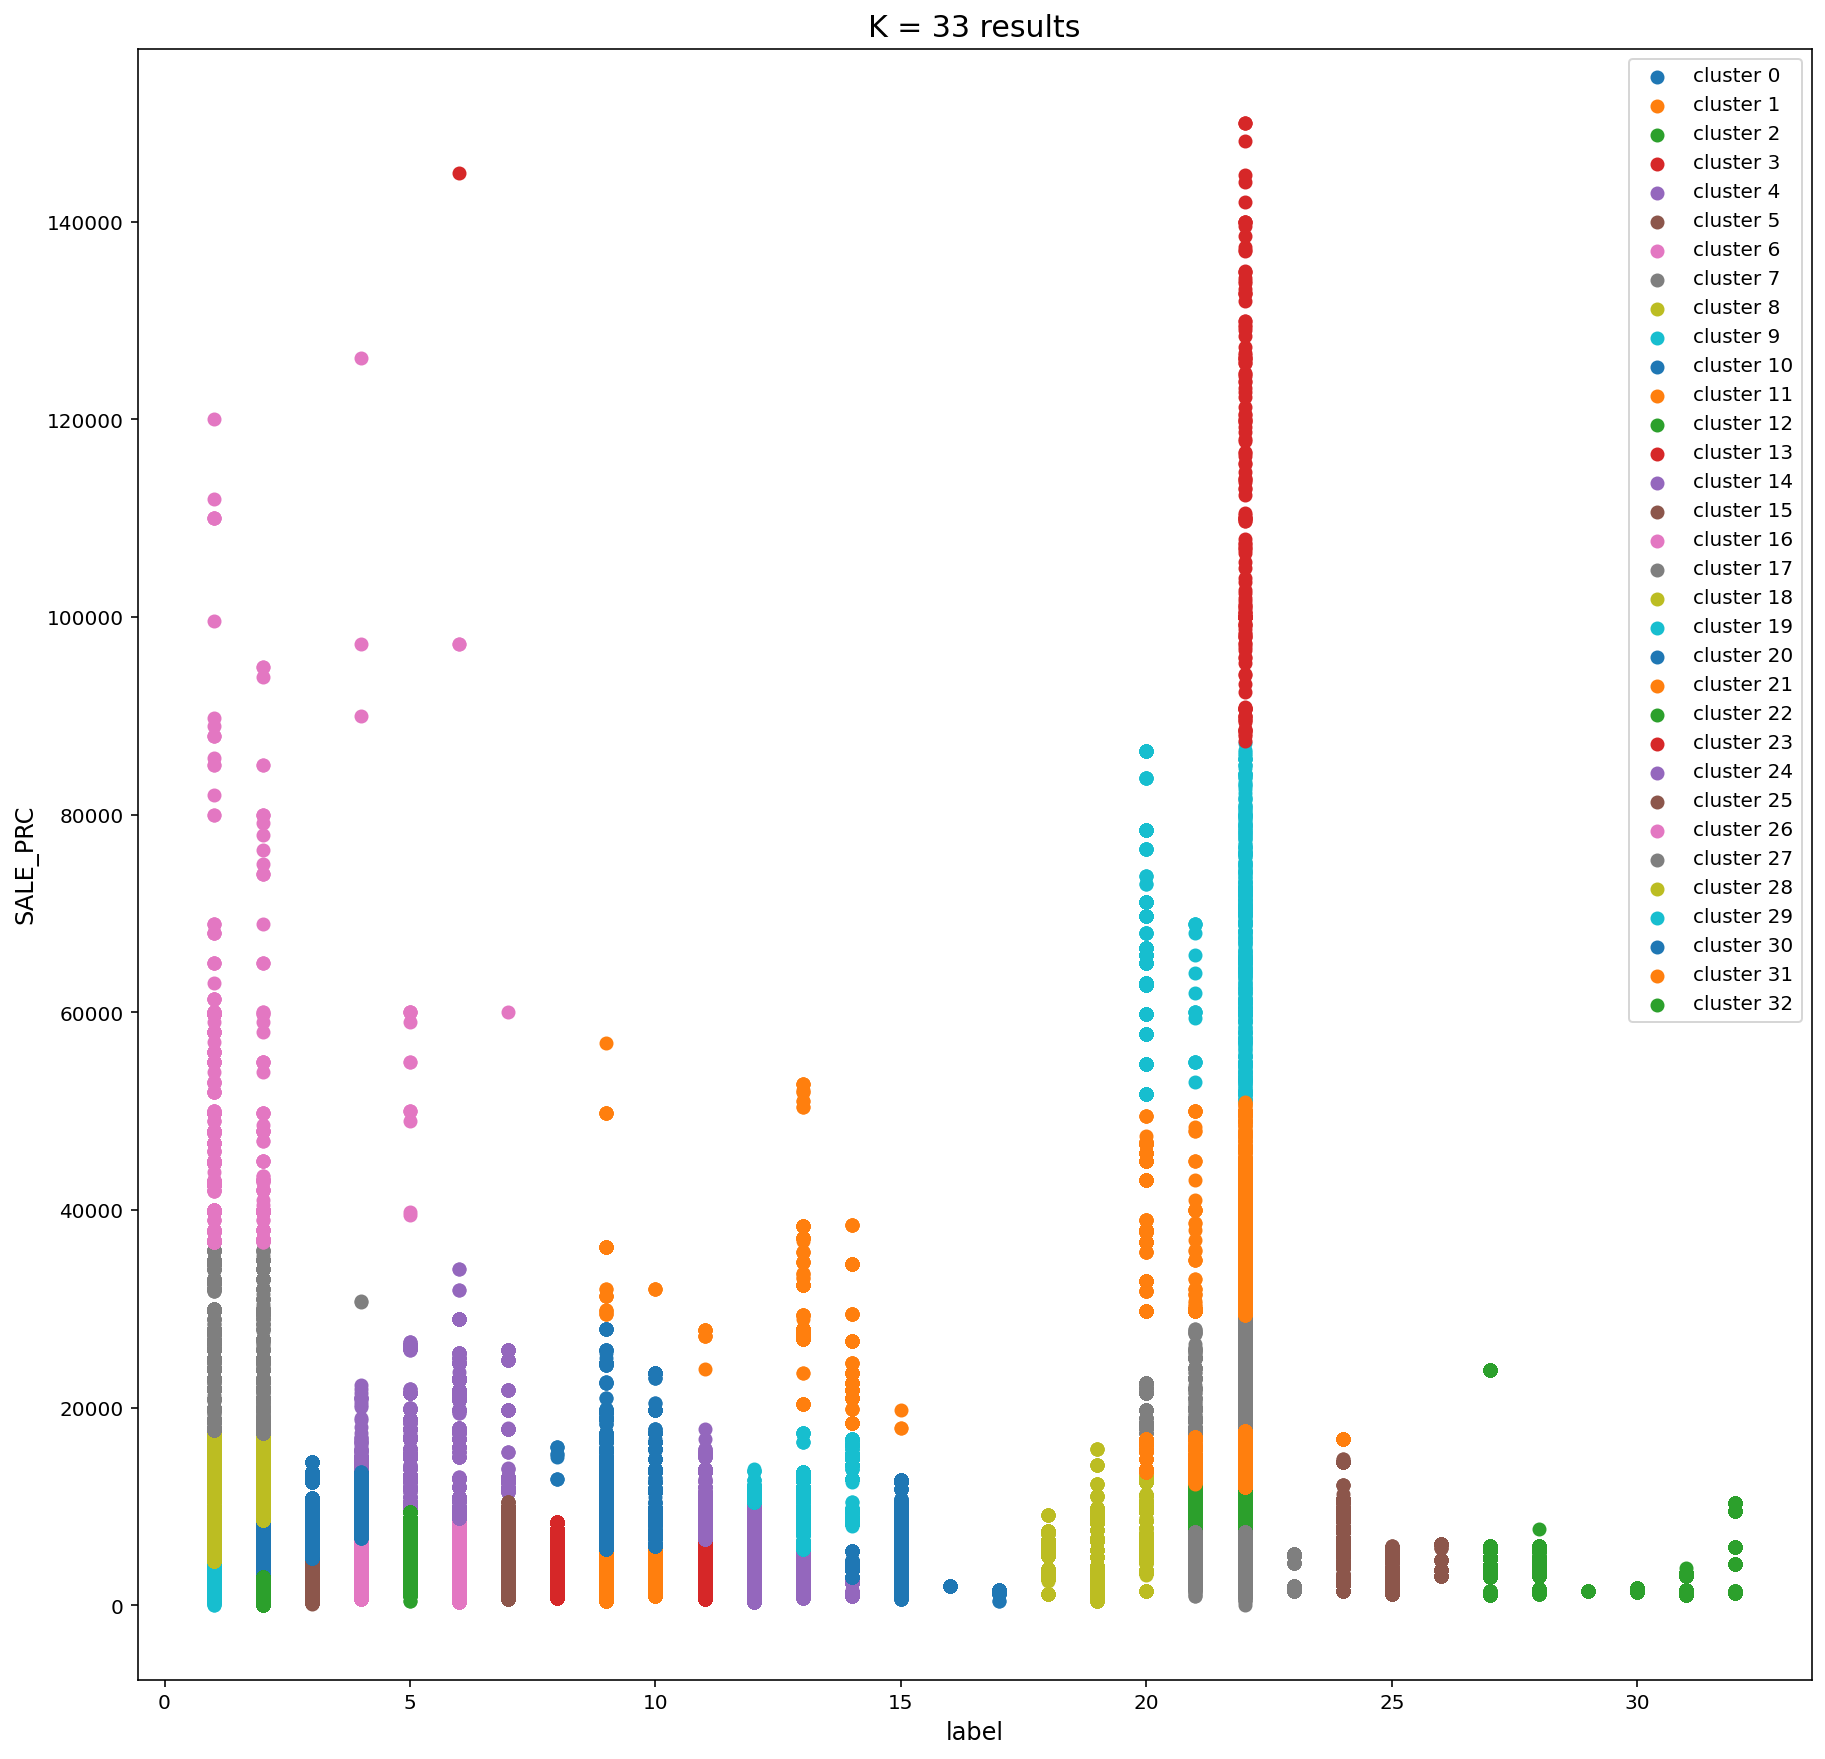

In [100]:
dfdf = df_1[['SALE_PRC', 'label']]

scaler = MinMaxScaler()
df_scale = scaler.fit_transform(dfdf)
k = 33

model = KMeans(n_clusters = k, random_state = 42)

model.fit(df_scale)

df_1['cluster'] = model.fit_predict(df_scale)
plt.figure(figsize = (15, 15))

for i in range(k):
    plt.scatter(df_1.loc[df_1['cluster'] == i, 'label'], df_1.loc[df_1['cluster'] == i, 'SALE_PRC'], 
                label = 'cluster ' + str(i))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('label', size = 12)
plt.ylabel('SALE_PRC', size = 12)
plt.show()

In [101]:
dfdf_24 = df_1[df_1['cluster']==24]
dfdf_24.대분류.value_counts()

냉동         11545
통조림/즉석밥     3016
Name: 대분류, dtype: int64

In [80]:
dfdf_11 = df_1[df_1['cluster']==11]
# dfdf_11.대분류.value_counts()
dfdf_11

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday,대분류,소분류,label,cluster
2188135,2022-01-01,8801007100838,백하얀설탕1kg,1,2100,2100,1,5,소스/양념/조미료,설탕,9,11
2188136,2022-01-01,8801007100838,백하얀설탕1kg,2,2100,4200,1,5,소스/양념/조미료,설탕,9,11
2188137,2022-01-01,8801007100838,백하얀설탕1kg,1,2100,2100,1,5,소스/양념/조미료,설탕,9,11
2188138,2022-01-01,8801007100838,백하얀설탕1kg,1,2100,2100,1,5,소스/양념/조미료,설탕,9,11
2188139,2022-01-02,8801007100838,백하얀설탕1kg,1,2100,2100,1,6,소스/양념/조미료,설탕,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...
13056627,2022-01-29,8809425110019,반달슬라이스,1,4350,4350,1,5,김치/반찬,단무지/쌈무,10,11
13056628,2022-01-29,8809425110019,반달슬라이스,1,4350,4350,1,5,김치/반찬,단무지/쌈무,10,11
13056629,2022-01-29,8809425110019,반달슬라이스,2,4350,8700,1,5,김치/반찬,단무지/쌈무,10,11
13056630,2022-01-29,8809425110019,반달슬라이스,2,4350,8700,1,5,김치/반찬,단무지/쌈무,10,11


In [104]:
dfdf_16 = df_1[df_1['cluster']==16]
dfdf_16
# dfdf_16.대분류.value_counts()

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday,대분류,소분류,label,cluster
1374415,2022-01-01,8809740500045,도토리묵,1,1000,1000,1,5,냉장식품,묵,4,16
1374416,2022-01-02,8809740500045,도토리묵,1,1000,1000,1,6,냉장식품,묵,4,16
1374417,2022-01-03,8809740500045,도토리묵,2,1000,2000,1,0,냉장식품,묵,4,16
1374418,2022-01-03,8809740500045,도토리묵,1,1000,1000,1,0,냉장식품,묵,4,16
1374419,2022-01-04,8809740500045,도토리묵,1,1000,1000,1,1,냉장식품,묵,4,16
...,...,...,...,...,...,...,...,...,...,...,...,...
13027028,2022-01-28,8809266251513,청정원푸드마크찰진순대,2,2980,5960,1,4,냉장식품,냉장치킨족발류,4,16
13027029,2022-01-29,8809266251513,청정원푸드마크찰진순대,1,2980,2980,1,5,냉장식품,냉장치킨족발류,4,16
13027030,2022-01-29,8809266251513,청정원푸드마크찰진순대,1,2980,2980,1,5,냉장식품,냉장치킨족발류,4,16
13027031,2022-01-29,8809266251513,청정원푸드마크찰진순대,1,2980,2980,1,5,냉장식품,냉장치킨족발류,4,16


In [85]:
dfdf_6 = df_1[df_1['cluster']==6]
dfdf_6
# dfdf_16.대분류.value_counts()

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday,대분류,소분류,label,cluster
1722730,2022-01-01,8801094012403,코카콜라15L,1,2900,2900,1,5,생수/음료/커피,음료,6,6
1722731,2022-01-01,8801094012403,코카콜라15L,1,2900,2900,1,5,생수/음료/커피,음료,6,6
1722732,2022-01-03,8801094012403,코카콜라15L,3,2900,8700,1,0,생수/음료/커피,음료,6,6
1722733,2022-01-03,8801094012403,코카콜라15L,1,2900,2900,1,0,생수/음료/커피,음료,6,6
1722734,2022-01-04,8801094012403,코카콜라15L,2,2900,5800,1,1,생수/음료/커피,음료,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
13038448,2022-01-16,8809345616523,청정원뉴케어미니구수한맛,1,1200,1200,1,6,생수/음료/커피,음료,6,6
13038449,2022-01-17,8809345616523,청정원뉴케어미니구수한맛,2,1200,2400,1,0,생수/음료/커피,음료,6,6
13038450,2022-01-18,8809345616523,청정원뉴케어미니구수한맛,1,1200,1200,1,1,생수/음료/커피,음료,6,6
13038451,2022-01-29,8809345616523,청정원뉴케어미니구수한맛,1,1200,1200,1,5,생수/음료/커피,음료,6,6


In [102]:
dfdf_6 = df_1[df_1['cluster']==6]
dfdf_6
# dfdf_16.대분류.value_counts()

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday,대분류,소분류,label,cluster
1722730,2022-01-01,8801094012403,코카콜라15L,1,2900,2900,1,5,생수/음료/커피,음료,6,6
1722731,2022-01-01,8801094012403,코카콜라15L,1,2900,2900,1,5,생수/음료/커피,음료,6,6
1722732,2022-01-03,8801094012403,코카콜라15L,3,2900,8700,1,0,생수/음료/커피,음료,6,6
1722733,2022-01-03,8801094012403,코카콜라15L,1,2900,2900,1,0,생수/음료/커피,음료,6,6
1722734,2022-01-04,8801094012403,코카콜라15L,2,2900,5800,1,1,생수/음료/커피,음료,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
13038448,2022-01-16,8809345616523,청정원뉴케어미니구수한맛,1,1200,1200,1,6,생수/음료/커피,음료,6,6
13038449,2022-01-17,8809345616523,청정원뉴케어미니구수한맛,2,1200,2400,1,0,생수/음료/커피,음료,6,6
13038450,2022-01-18,8809345616523,청정원뉴케어미니구수한맛,1,1200,1200,1,1,생수/음료/커피,음료,6,6
13038451,2022-01-29,8809345616523,청정원뉴케어미니구수한맛,1,1200,1200,1,5,생수/음료/커피,음료,6,6


# sd


In [ ]:
dfdf= df_fruit[df_fruit['weekday']==0]
dfdf = dfdf.drop(['PLU_CD','SALE_QTY','SALE_PRC','weekday','대분류','소분류','label','SAL_DT','GDS_NM'], axis=1)

In [ ]:
dfdf.label_2.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [113]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

In [112]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(data=scaler.fit_transform(dfdf), columns=dfdf.columns)

In [114]:
scaled_df.head()

,SALE_PRC,label
0,0.026667,0.032258
1,0.026667,0.032258
2,0.026667,0.032258
3,0.010000,0.032258
4,0.010000,0.032258


In [115]:
kmeans_2 = KMeans(n_clusters=3, random_state=42,init='random')
#visualizer 생성
visualizer_2 = SilhouetteVisualizer(kmeans_2, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_2.fit(scaled_df)      
visualizer_2.show()

KeyboardInterrupt: ignored

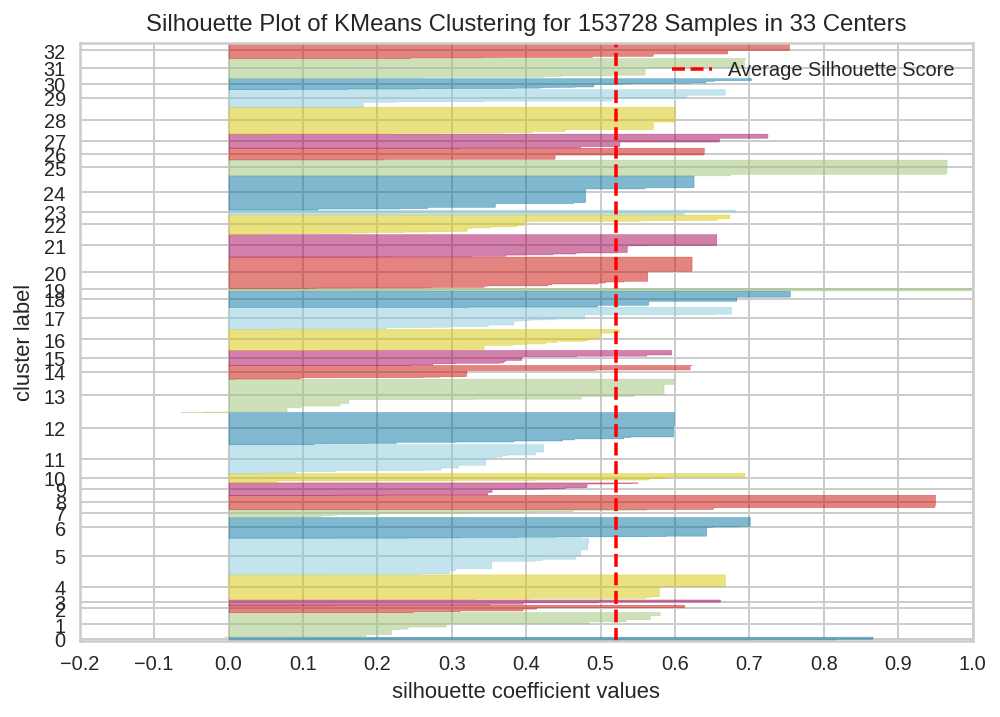

In [ ]:
kmeans_33 = KMeans(n_clusters=33, random_state=111,init='random')
#visualizer 생성
visualizer_33 = SilhouetteVisualizer(kmeans_33, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_33.fit(scaled_df)      
visualizer_33.show()

# KMode

In [12]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from kmodes.kmodes import KModes

In [27]:
df_1

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday,대분류,소분류
12134,2022-01-07,200024,대파1단,1,4000,4000,1,4,채소,파
12135,2022-01-07,200024,대파1단,1,4000,4000,1,4,채소,파
12136,2022-01-08,200024,대파1단,1,4000,4000,1,5,채소,파
12137,2022-01-22,200024,대파1단,1,1500,1500,1,5,채소,파
12138,2022-01-22,200024,대파1단,1,1500,1500,1,5,채소,파
...,...,...,...,...,...,...,...,...,...,...
13186824,2022-01-31,8809267390136,서라벌특란30구,1,6500,6500,1,0,두부/콩나물/계란,계란
13186825,2022-01-31,8809267390136,서라벌특란30구,1,6500,6500,1,0,두부/콩나물/계란,계란
13186826,2022-01-31,8809267390136,서라벌특란30구,1,6500,6500,1,0,두부/콩나물/계란,계란
13186827,2022-01-31,8809267390136,서라벌특란30구,1,6500,6500,1,0,두부/콩나물/계란,계란


In [ ]:
# cost = []
# K = range(1,7)
# for num in K:
#     kmode = KModes(n_clusters = num, n_init=3)
#     kmode.fit_predict(df_1)
#     cost.append(kmode.cost_)
# plt.plot(K, cost, 'bx-')
# plt.xlabel('number of clusters')
# plt.ylabel('cost')
# plt.title('elbow method for finding optimal K')
# plt.show()

In [28]:
df_1.columns

Index(['SAL_DT', 'PLU_CD', 'GDS_NM', 'SALE_QTY', 'SALE_PRC', 'SALE_AMT',
       'month', 'weekday', '대분류', '소분류'],
      dtype='object')

In [30]:
df1_cum = df_1.drop(['PLU_CD', 'month'], axis=1)

In [32]:
df1_cum.head()

,SAL_DT,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,weekday,대분류,소분류
12134,2022-01-07,대파1단,1,4000,4000,4,채소,파
12135,2022-01-07,대파1단,1,4000,4000,4,채소,파
12136,2022-01-08,대파1단,1,4000,4000,5,채소,파
12137,2022-01-22,대파1단,1,1500,1500,5,채소,파
12138,2022-01-22,대파1단,1,1500,1500,5,채소,파


In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1_cum = df1_cum.apply(le.fit_transform)
df1_cum.head()

,SAL_DT,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,weekday,대분류,소분류
12134,37,557,1,391,391,4,26,242
12135,37,557,1,391,391,4,26,242
12136,38,557,1,391,391,5,26,242
12137,52,557,1,141,141,5,26,242
12138,52,557,1,141,141,5,26,242


In [34]:
kmode = KModes(n_clusters = 3, n_init = 3, init='random')
clusters = kmode.fit_predict(df1_cum)

KeyboardInterrupt: ignored